<a href="https://colab.research.google.com/github/jesusvillota/CSS_DataScience_2025/blob/main/Session3/3_1_RAG_III_Vectorstores_And_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="max-width: 880px; margin: 20px auto 22px; padding: 0px; border-radius: 18px; border: 1px solid #e5e7eb; background: linear-gradient(180deg, #ffffff 0%, #f9fafb 100%); box-shadow: 0 8px 26px rgba(0,0,0,0.06); overflow: hidden;">

  <!-- Banner Header -->
  <div style="padding: 34px 32px 14px; text-align: center; line-height: 1.38;">
    <div style="font-size: 13px; letter-spacing: 0.14em; text-transform: uppercase; color: #6b7280; font-weight: bold; margin-bottom: 5px;">
      Session #3
    </div>
    <div style="font-size: 29px; font-weight: 800; color: #14276c; margin-bottom: 4px;">
      RAG with LangChain
    </div>
    <div style="font-size: 29px; font-weight: 800; color: #14276c; margin-bottom: 4px;">
      Part III: Vectorstores and Embeddings
    </div>
    <div style="font-size: 16.5px; color: #374151; font-style: italic; margin-bottom: 0;">
      Using Textual Data in Empirical Monetary Economics
    </div>
  </div>

  <!-- Logo Section -->
  <div style="background: none; text-align: center; margin: 30px 0 10px;">
    <img src="https://www.cemfi.es/images/Logo-Azul.png" alt="CEMFI Logo" style="width: 158px; filter: drop-shadow(0 2px 12px rgba(56,84,156,0.05)); margin-bottom: 0;">
  </div>

  <!-- Name -->
  <div style="font-family: 'Times New Roman', Times, serif; color: #38549c; text-align: center; font-size: 1.22em; font-weight: bold; margin-bottom: 0px;">
    Jesus Villota Miranda © 2025
  </div>

  <!-- Contact info -->
  <div style="font-family: 'Times New Roman', Times, serif; color: #38549c; text-align: center; font-size: 1em; margin-top: 7px; margin-bottom: 20px;">
    <a href="mailto:jesus.villota@cemfi.edu.es" style="color: #38549c; text-decoration: none; margin-right:8px;" title="Email">
      <!-- Email logo -->
      <!-- <img src="https://cdn-icons-png.flaticon.com/512/11679/11679732.png" alt="Email" style="width:18px; vertical-align:middle; margin-right:5px;"> -->
      jesus.villota@cemfi.edu.es
    </a>
    <span style="color:#9fa7bd;">|</span>
    <a href="https://www.linkedin.com/in/jesusvillotamiranda/" target="_blank" style="color: #38549c; text-decoration: none; margin-left:7px;" title="LinkedIn">
      <!-- LinkedIn logo -->
      <!-- <img src="https://1.bp.blogspot.com/-onvhHUdW1Us/YI52e9j4eKI/AAAAAAAAE4c/6s9wzOpIDYcAo4YmTX1Qg51OlwMFmilFACLcBGAsYHQ/s1600/Logo%2BLinkedin.png" alt="LinkedIn" style="width:17px; vertical-align:middle; margin-right:5px;"> -->
      LinkedIn
    </a>
  </div>
</div>


**IMPORTANT**: **Are you running this notebook in Google Colab?**

- If so, please make sure that in the cell below `running_in_colab` is set to `True`

- And, of course,  make sure to **run the cell**!

In [1]:
running_in_colab = False

In [2]:
from pathlib import Path
folder_dir = Path("output/2_2/downloads")

if running_in_colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    folder_dir = Path('/content/gdrive/My Drive/') / folder_dir
else: 
    from dotenv import load_dotenv, find_dotenv
    _ = load_dotenv(find_dotenv()) # read local .env file
    folder_dir = Path('../') / folder_dir

# Vectorstores and Embeddings

Recall the overall workflow for retrieval augmented generation (RAG):

![overview.jpeg](images/rag_pipeline.png)

## Introduction to Vectorstores and Embeddings

We've now got our documents split up into small, semantically meaningful chunks, and it's time to put these chunks into an index where we can easily retrieve them when answering questions about our corpus of data.

In this notebook, we'll explore embeddings and vector stores:

- **Embeddings**: These take a piece of text and create a numerical representation of that text. Text with similar content will have similar vectors in this numeric space.
- **Vector stores**: Databases where you can easily look up similar vectors.

The overall workflow is:
1. Start with documents
2. Create smaller splits of those documents
3. Create embeddings of those documents
4. Store the embeddings in a vector store

Later, when we have a question:
1. Create an embedding for the question
2. Find the most similar document embeddings in the vector store
3. Pass the similar document chunks and the question to an LLM
4. Get back an answer

This process is the foundation of retrieval augmented generation (RAG).

## Document Loading and Splitting

We've already discussed **Document Loading** and **Splitting** in previous notebooks.

For this notebook, we'll be working with the BIS speeches we downloaded yesterday. We'll load a few of them.

After loading, we'll use the recursive character text splitter to create chunks of appropriate size for our vector store.

In [3]:
if running_in_colab: 
    ! pip install langchain pypdf
    ! pip install -U langchain-community

In [4]:
from langchain.document_loaders import PyPDFLoader

# Load PDF
loaders = [
    PyPDFLoader(folder_dir / "05_August_2025-Lisa_D_Cook.pdf"),
    PyPDFLoader(folder_dir / "05_August_2025-Adnan_Zaylani_Mohamad_Zahid.pdf"),
    PyPDFLoader(folder_dir / "05_August_2025-Adriana_D_Kugler.pdf"),
    PyPDFLoader(folder_dir / "10_July_2025-Jose_Luis_Escrivá.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())

In [5]:
len(docs)

35

In [6]:
for i, doc in enumerate(docs):
    print(f"📄 Doc {i}: {doc.page_content}")
    print("-"*100)

📄 Doc 0: For release on delivery 
1:30 p.m. EDT  
July 17, 2025 
 
 
 
 
 
 
 
 
AI: A Fed Policymaker’s View 
 
 
Remarks by 
 
Lisa D. Cook 
 
Member 
 
Board of Governors of the Federal Reserve System 
 
at the 
 
National Bureau of Economic Research, 
Summer Institute 2025:  Digital Economics and Artificial Intelligence 
 
Cambridge, Massachusetts  
 
 
 
 
 
 
 
 
July 17, 2025
----------------------------------------------------------------------------------------------------
📄 Doc 1: Thank you, Avi.  It is an honor to be back with you at the NBER Summer Institute.  
Thanks to you, Erik, and Catherine for organizing these insightful and thought-provoking 
sessions this summer.1 
Artificial intelligence (AI) is advancing across the globe and permeating every corner of 
the economy at an incredibly rapid rate.  This has significant implications for Federal Reserve 
leaders, both as policymakers and managers of the organization.  AI is transforming the 
economy, including by acceler

- Now let's split the documents using the `RecursiveCharacterTextSplitter`. 

- We will visualize each split by calling the attribute `.page_content`. As you will see, all documents are merged into a single piece of text and then split using our predefined splitter. This may seem weird at first, one could think that, by doing this, we are losing the sources of information...

- But... don't worry about it! we have the metadata to identify the source of each split! (you can see that metadata by calling the `.metadata` attribute!)

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [ ]:
splits = text_splitter.split_documents(docs)

for i, split in enumerate(splits): 
    print(f"🔍 Split {i}: {split.page_content}")
    print("-"*100)

🔍 Split 0: For release on delivery 
1:30 p.m. EDT  
July 17, 2025 
 
 
 
 
 
 
 
 
AI: A Fed Policymaker’s View 
 
 
Remarks by 
 
Lisa D. Cook 
 
Member 
 
Board of Governors of the Federal Reserve System 
 
at the 
 
National Bureau of Economic Research, 
Summer Institute 2025:  Digital Economics and Artificial Intelligence 
 
Cambridge, Massachusetts  
 
 
 
 
 
 
 
 
July 17, 2025
----------------------------------------------------------------------------------------------------
🔍 Split 1: Thank you, Avi.  It is an honor to be back with you at the NBER Summer Institute.  
Thanks to you, Erik, and Catherine for organizing these insightful and thought-provoking 
sessions this summer.1 
Artificial intelligence (AI) is advancing across the globe and permeating every corner of 
the economy at an incredibly rapid rate.  This has significant implications for Federal Reserve 
leaders, both as policymakers and managers of the organization.  AI is transforming the 
economy, including by acc

In [9]:
len(splits)

69

## Embeddings

![overview.jpeg](images/embeddings.png)

Let's take our splits and embed them using a free, local sentence-transformer model (no API key required). If you prefer, you can swap to hosted providers like OpenAI, but local models are fast and cost-free.

Embeddings are numerical representations of text that capture semantic meaning. When we create embeddings:
- Text with similar content will have similar vectors in this numeric space
- We can compare these vectors to find pieces of text that are similar
- The similarity is often measured using dot products or cosine similarity

![overview.jpeg](images/embeddings_compare.png)

Before working with our real document chunks, let's first look at a simple example with a few sentences to understand how embeddings capture semantic similarity.

Note: Different embedding models produce vectors with different dimensions and scales, so similarity scores may not be numerically identical across models, although relative rankings are usually comparable.

In [10]:
# Use free, local embeddings via SentenceTransformers
# Model options: "all-MiniLM-L6-v2" (384-dim, fast) or multilingual ones like "paraphrase-multilingual-MiniLM-L12-v2"
from langchain_huggingface import HuggingFaceEmbeddings
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
persist_directory = 'docs/chroma/'

In [11]:
# sentence1 = "My dog Rover likes to chase squirrels"
# sentence2 = "Fluffy, my cat, refuses to eat from a can"
# sentence3 = "The Chevy Bolt accelerates to 60 mph in 6.7 seconds"

In [12]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [13]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

# Let's see what these embeddings look like
import numpy as np
print(f"\n📦 Embedding 1: <shape={(len(embedding1),1)}> \n\n{np.array(embedding1)}")
print(f"\n📦 Embedding 2: <shape={(len(embedding2),1)}> \n\n{np.array(embedding2)}")
print(f"\n📦 Embedding 3: <shape={(len(embedding3),1)}> \n\n{np.array(embedding3)}")


📦 Embedding 1: <shape=(384, 1)> 

[-5.84880449e-02 -2.79528741e-02  6.88477829e-02  2.85012946e-02
 -6.79694489e-02 -2.25782720e-03  7.21920282e-02 -5.46667399e-03
  1.04574941e-01  5.83925806e-02  7.27048591e-02 -6.51336685e-02
  9.13777668e-03  2.31483076e-02  2.56758630e-02  2.24042665e-02
 -1.93842705e-02  8.25170986e-03 -3.33848819e-02 -1.26739042e-02
 -1.75061405e-01  3.85673530e-02  1.64742041e-02 -9.61419474e-03
 -1.26228616e-01  4.49694470e-02  1.07603427e-02 -7.92952627e-02
  2.19479855e-02 -2.50543235e-03 -4.75633964e-02  2.01204196e-02
 -4.47403677e-02  1.91092975e-02 -2.94928178e-02 -4.56632487e-03
  2.11084094e-02 -5.06258151e-03  4.03253064e-02  3.61742564e-02
  7.44007854e-03 -2.67044939e-02  7.77759850e-02 -3.73475738e-02
 -7.91656747e-02 -2.60275379e-02 -6.16696663e-02 -7.85880312e-02
  8.81747752e-02  5.01648597e-02  1.12417929e-01  5.41629866e-02
 -2.85474304e-02  1.52992853e-03 -1.07026286e-03 -3.32357772e-02
 -6.52481019e-02  6.43157363e-02  1.68285295e-02 -8.319

In [14]:
# Dot product calculations
dot_product_1_2 = np.dot(embedding1, embedding2)
dot_product_1_3 = np.dot(embedding1, embedding3)
dot_product_2_3 = np.dot(embedding2, embedding3)

print("\nDot Products Between Sentence Embeddings:")
print(f"'{sentence1}' ↔ '{sentence2}': {dot_product_1_2:.4f}")
print(f"'{sentence1}' ↔ '{sentence3}': {dot_product_1_3:.4f}")
print(f"'{sentence2}' ↔ '{sentence3}': {dot_product_2_3:.4f}")


Dot Products Between Sentence Embeddings:
'i like dogs' ↔ 'i like canines': 0.9152
'i like dogs' ↔ 'the weather is ugly outside': 0.0834
'i like canines' ↔ 'the weather is ugly outside': 0.0404


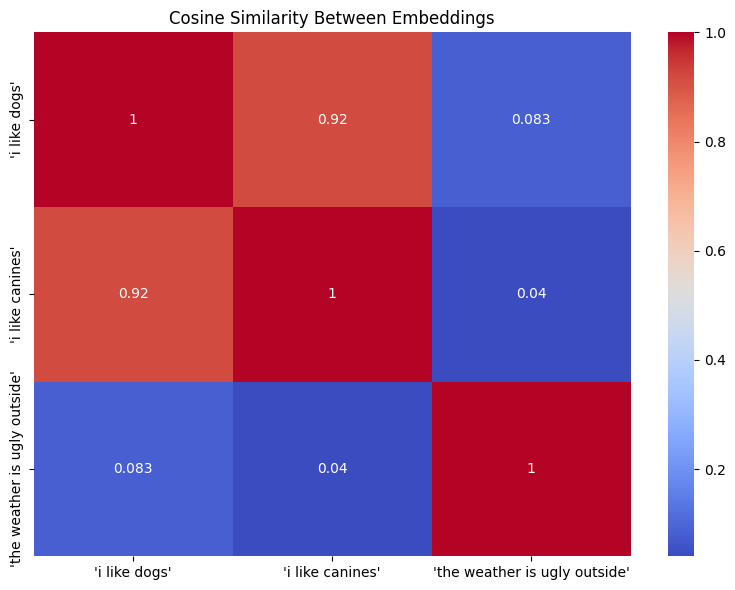

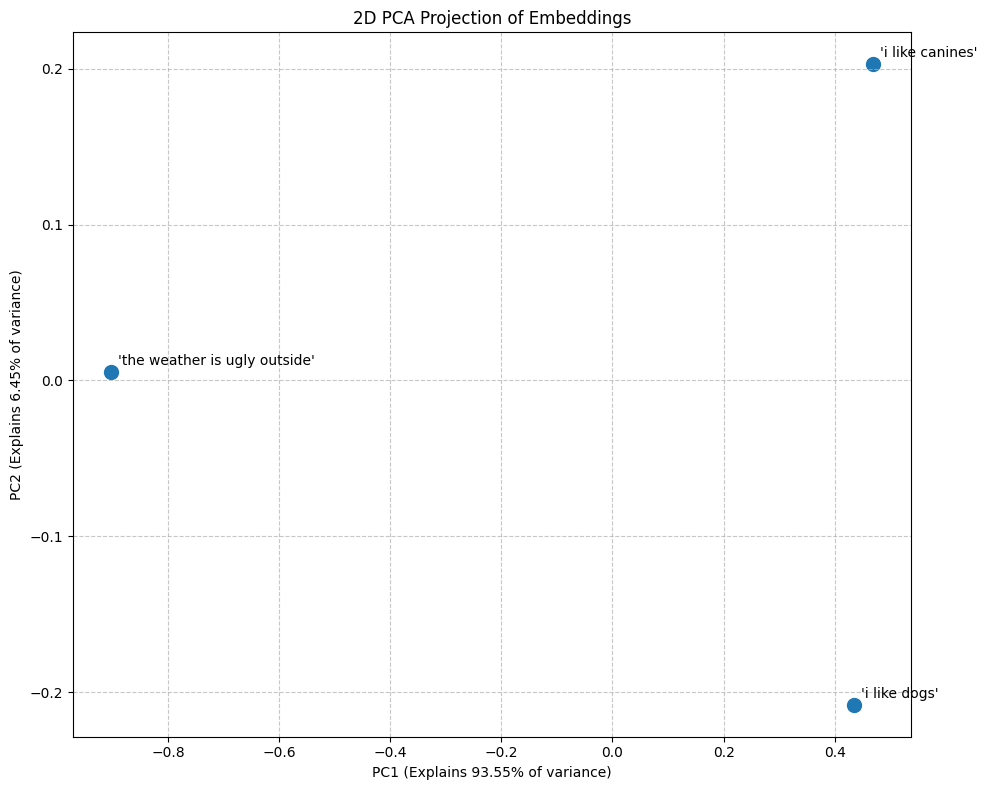

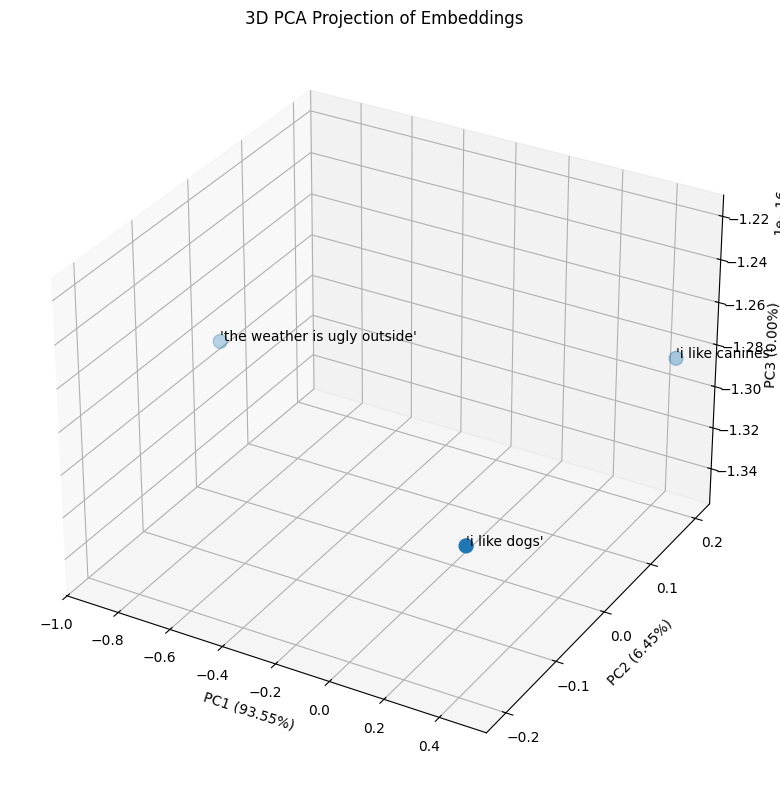

In [15]:
# Let's visualize the embeddings in multiple ways

# 1. Let's compute the cosine similarity between embeddings
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Convert embeddings to numpy arrays for processing
emb_array1 = np.array(embedding1).reshape(1, -1)
emb_array2 = np.array(embedding2).reshape(1, -1)
emb_array3 = np.array(embedding3).reshape(1, -1)

# Stack all embeddings
all_embeddings = np.vstack([emb_array1, emb_array2, emb_array3])

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(all_embeddings)

# Create a heatmap of similarities
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', 
            xticklabels=[f"'{sentence1}'", f"'{sentence2}'", f"'{sentence3}'"],
            yticklabels=[f"'{sentence1}'", f"'{sentence2}'", f"'{sentence3}'"])
plt.title("Cosine Similarity Between Embeddings")
plt.tight_layout()
plt.show()

# 2. Reduce dimensionality with PCA to visualize the embeddings in 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings)

# Plot in 2D
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=100)

# Add labels for each point
sentences = [sentence1, sentence2, sentence3]
for i, sentence in enumerate(sentences):
    plt.annotate(f"'{sentence}'", 
                 (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                 xytext=(5, 5), textcoords='offset points')

plt.title("2D PCA Projection of Embeddings")
plt.xlabel(f"PC1 (Explains {pca.explained_variance_ratio_[0]:.2%} of variance)")
plt.ylabel(f"PC2 (Explains {pca.explained_variance_ratio_[1]:.2%} of variance)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Visualize in 3D with PCA
pca_3d = PCA(n_components=3)
embeddings_3d = pca_3d.fit_transform(all_embeddings)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], s=100)

# Add labels
for i, sentence in enumerate(sentences):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], f"'{sentence}'")

ax.set_title("3D PCA Projection of Embeddings")
ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})")
plt.tight_layout()
plt.show()

### Understanding the Dot Product Results

We used the dot product to compare our embeddings. For many embedding models, a higher dot product value indicates greater similarity between the texts (cosine similarity is also common).

From the results, you should see that:
- Sentences about similar topics (e.g., dogs vs. canines) have a higher similarity score
- Sentences about unrelated topics (e.g., pets vs. weather) have lower similarity

This demonstrates how embeddings capture semantic meaning rather than just keyword matching. The sentences about pets are recognized as similar even though they use different terms (dogs vs. canines).

## Vectorstores

Now that we understand embeddings, let's look at vector stores - databases that store embeddings and allow for efficient similarity search.

![overview.jpeg](images/vectorstore.png)

LangChain has integrations with over 30 different vector stores. For this lesson, we'll use Chroma because:
- It's lightweight and in-memory
- It's easy to get started with
- It allows us to persist data to disk

Other vector stores offer hosted solutions, which can be useful for large datasets or cloud storage needs.

We'll create a vector store from our document chunks, each represented by its embedding.

In [16]:
if running_in_colab:
    ! pip install chromadb # or: pip install chroma-client
    # !pip install sentence-transformers langchain-huggingface

In [19]:
from langchain_community.vectorstores import Chroma

vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding
)

In [20]:
print(vectordb._collection.count())

138


### Similarity Search

Now that we have our documents in the vector store, we can perform similarity searches to find relevant information.

The workflow is:
1. Create a query (question)
2. Convert the query to an embedding
3. Find the most similar document embeddings in the vector store using the `similarity_search` method
4. Return the k most similar documents

Let's try this with a question about course contact information. The vector store will find document chunks that are semantically similar to our query, even if they don't contain the exact same words.

In [21]:
question = "What's the role of AI in monetary policy?"

In [22]:
docs = vectordb.similarity_search(question,k=5)

In [23]:
for i, doc in enumerate(docs):
    print("\n" + "="*40 + f"[ 📄 Relevant Chunk {i+1} ]" + "="*40)
    print(doc.page_content)


========================================[ 📄 Relevant Chunk 1 ]========================================
Implications for Monetary Policy 
Given what we know, as well as what we learn from researchers like you, we are thinking 
carefully about the implications of AI for monetary policy.  As AI filters through the economy, it 
has the potential to affect both sides of our dual mandate in different ways. 
As with other technological innovations, AI is poised to reshape our labor market, which 
in turn could affect our notion of maximum employment or our estimate of the natural rate of 
unemployment.  I see it as likely that AI will allow workers to be more productive while also 
changing the tasks associated with any given job.  As with many technological breakthroughs, a 
certain set of jobs may be replaced.  We must recognize the challenges and potential pain this

========================================[ 📄 Relevant Chunk 2 ]========================================
Implications for Mon

Some things to experiment with:
- Try different values of `k` (the number of documents to retrieve)
- Notice that as `k` increases, documents toward the end of the results may be less relevant
- Create your own queries and see what other edge cases you can discover